In [1]:
import pyrealsense2 as rs
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

%load_ext autoreload
%autoreload 2


In [8]:
# Create a context object. This object owns the handles to all connected realsense devices
pipeline = rs.pipeline()
pipeline.start()

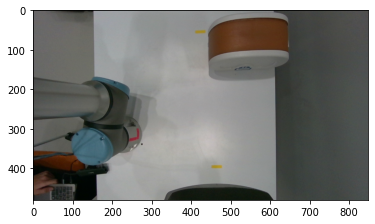

In [64]:
frames = pipeline.wait_for_frames()
depth = frames.get_depth_frame()
rgb = frames.get_color_frame()
rgb_img = np.asanyarray(rgb.get_data())
plt.imshow(rgb_img)

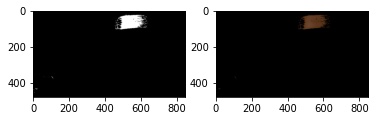

In [65]:
from SurfaceContact.scene import extractBodyPixels,bodyCentroid
import cv2
scene = rgb_img
mask =  extractBodyPixels(scene)
result = cv2.bitwise_and(scene,scene,mask = mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

In [66]:

target_loc = bodyCentroid(mask)
target_loc = np.array(target_loc,dtype = np.int)

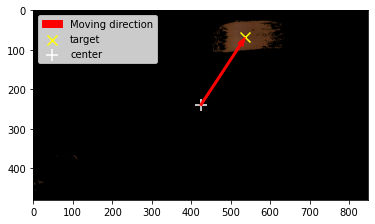

In [85]:
from numpy import linalg as la
h,w = mask.shape
center = np.array([w//2,h//2])
offset = target_loc-center
plt.scatter(target_loc[0],target_loc[1],marker="x",color = 'yellow',label='target',s=100)
plt.scatter(center[0],center[1],marker="+",color = 'white',label='center',s = 150)

arrow_width = 5
head_length = 4.5*arrow_width
plt.arrow(*center,
          *(offset-head_length*offset/la.norm(offset)),
          color = 'red',width = arrow_width,head_length = head_length,
          label = 'Moving direction')

plt.imshow(result)
plt.legend()
plt.show()

In [44]:
center

array([424,   0])